In [68]:
import numpy as np
from scipy.stats import kstest, normaltest, ttest_1samp, wilcoxon, ranksums, ttest_ind
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('C:\Users\Rezanick\Desktop\Projects\Springboard\Exercise 2\EDA_human_temperature\data')
df = pd.read_csv('human_body_temperature.csv')

In [10]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [7]:
df.index

RangeIndex(start=0, stop=130, step=1)

In [8]:
df.columns

Index([u'temperature', u'gender', u'heart_rate'], dtype='object')

In [103]:
mean=np.mean(df['temperature'])
print('Mean human body temperature is: %1.2f')%(mean)

Mean human body temperature is: 98.25


In [23]:
std=np.std(df['temperature'])
print('Standard deviation of human body temperature is: %1.2f')%(std)

Standard deviation of human body temperature is: 0.73


In [59]:
from __future__ import division

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

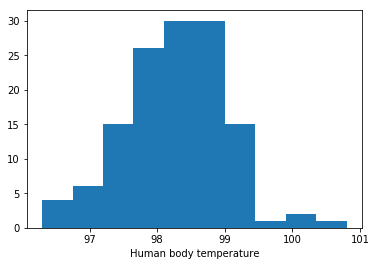

In [36]:
plt.hist(df['temperature'])
plt.xlabel('Human body temperature')
plt.show()

In [33]:
samples = np.random.normal(mean, std, size=10000)

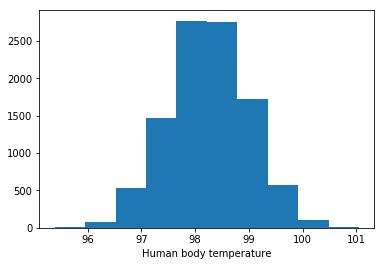

In [35]:
plt.hist(samples)
plt.xlabel('Human body temperature')
plt.show()

In [60]:
x_theor, y_theor = ecdf(samples)
x, y = ecdf(df['temperature'])

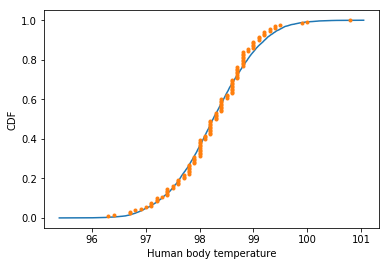

In [63]:
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.05)
_ = plt.xlabel('Human body temperature')
_ = plt.ylabel('CDF')
plt.show()

In [79]:
#We use Kolmogorov–Smirnov test test to check the normality of the data
def explain_test(pval,test):
    if pval > 0.05:
        print('The '+ test + ' indicates that human body temperature dataset is not normally distirbuted')
    else:
        print('The '+ test + ' indicates that the data is normally distirbuted')

def norm_tests(data):
    _,p = kstest(data, 'norm')
    explain_test(p,'Kolmogorov-Smirnov test')


In [80]:
norm_tests(df['temperature'])

The Kolmogorov-Smirnov test indicates that the data is normally distirbuted


1. The theoretical CDF and the ECDF of the data and Kolmogorov-Smirnov test suggest that the human body temperature data is, indeed, Normally distributed

In [81]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

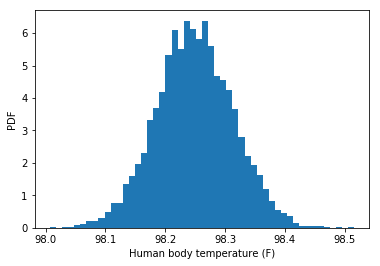

In [88]:
bs_replicates = draw_bs_reps(df['temperature'], np.mean, size=10000)

plt.hist(bs_replicates, bins=50, normed=True)
plt.xlabel('Human body temperature (F)')
plt.ylabel('PDF')
plt.show()

In [102]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
# Print the confidence interval
print('95% confidence interval for human body temperature:')
print(conf_int)


95% confidence interval for human body temperature:
[ 98.12307692  98.37538462]


One-sample bootstrap test:  The goal is to calculate the probability of getting a mean temperature less than or equal to what was asked (98.6) if the hypothesis that the true mean of current data is equal to that of asked (98.6). 

In [105]:
translated_temp =np.array(df['temperature'])  - np.mean(df['temperature']) + 98.6

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_temp, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(df['temperature'])) / 10000

# Print the p-value
print('p = ', p)


('p = ', 0.0)


The low p-value suggests that the null hypothesis that the mean temperature is 98.6 is false.

In [111]:
def by_gender(df):
    x = df.temperature
    females = x[(df.gender == 'F').values]
    males = x[(df.gender == 'M').values]
    return females, males
females, males = by_gender(df)

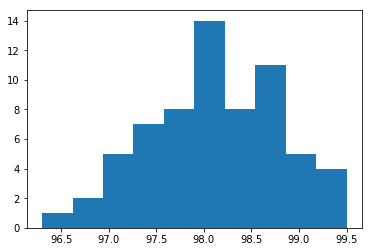

In [113]:
plt.hist(males)
plt.show()